# Udacity Intro to Data Analysis - Project 2

The objective of this project is to analyze the Titanic dataset provided by [kaggle.com](https://www.kaggle.com/c/titanic/data).

These are the variables of the dataset:
* survival        Survival (0 = No; 1 = Yes)
* pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name            Name
* sex             Sex
* age             Age
* sibsp           Number of Siblings/Spouses Aboard
* parch           Number of Parents/Children Aboard
* ticket          Ticket Number
* fare            Passenger Fare
* cabin           Cabin
* embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



## Questions
Central Question: What factors made people more likely to survive?

More questions:
* Did the following factors influence the chance to survive:
    * Age
    * Sex
    * Passenger Class
    * any other?


## Data wrangling

In this section, I will take a first look at the data in order to get an overview of the data.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
%pylab inline
from scipy.stats import chi2_contingency

path = 'titanic_data.csv'
df = pd.read_csv(path)

Populating the interactive namespace from numpy and matplotlib


In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Generating histograms for all variables is definitely not reasonable (for example for the passenger ID), so I will not generate them for all columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fd2e860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fe5f320>]], dtype=object)

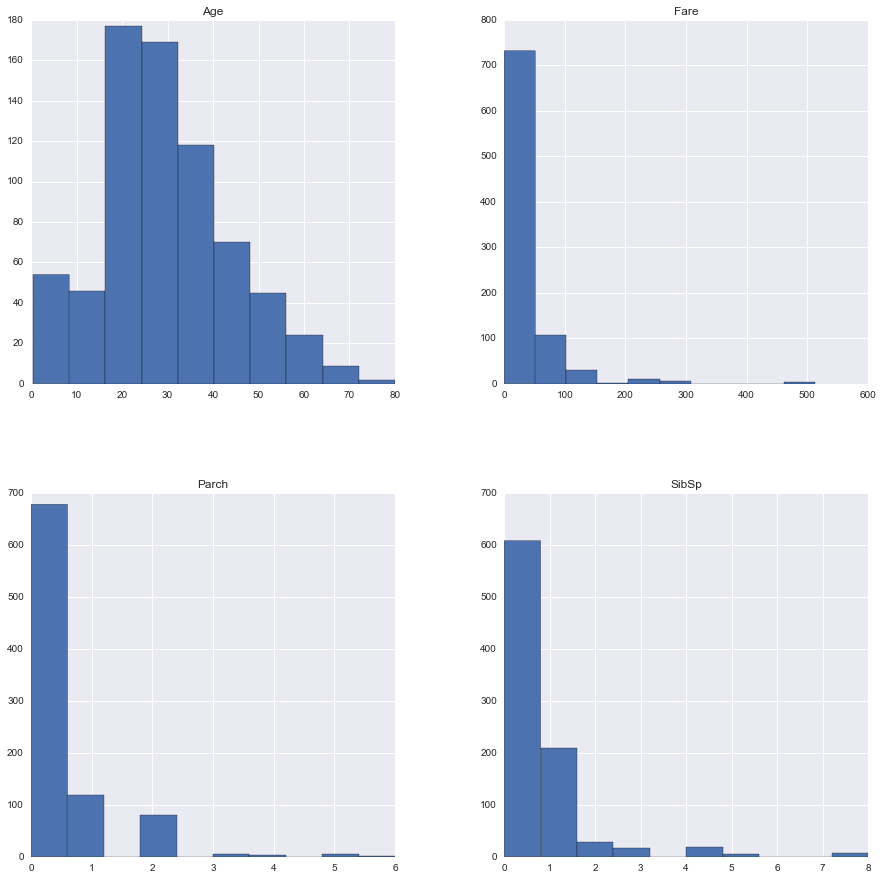

In [108]:
df[['Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']].hist(figsize=(15,15))

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Child          891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


One thing that suprised me here is the datatype of *Sex*. As there are probably only two different categories (i.e. female and male), this should not be an object as this makes further analyses more difficult or even not possible.

But let's check which kind of objects we have in this column:

In [110]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [111]:
df['Sex'].value_counts() 

male      577
female    314
Name: Sex, dtype: int64

There are only two types of genders here, so I am mapping them to true/false

In [112]:
d = {'female': 1, 'male': 0}
df['Female'] = df['Sex'].map(d)

## Exploring the data

In [113]:
df[["Survived", "PassengerId"]].groupby("Survived").count()

,PassengerId
Survived,
0,549
1,342


First of all, with 549 passengers who did not survive and only 342 survivors, we can say that it is more likely that passengers died than they survived.

We should take a look at the correlations to get more ideas about factors that made people more likely to survive.

### What factors made people more likely to survive?

As stated in the questions above, we should check several factors to see if they influenced the passengers' chance to survive. To start, we take a look at the correlation coefficients.

In [114]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Child,Female
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.017941,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.136107,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.121920,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.582875,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.352437,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.351481,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.003753,0.182333
Child,-0.017941,0.136107,0.121920,-0.582875,0.352437,0.351481,0.003753,1.000000,0.111141
Female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.111141,1.000000


To make the interpretation easier I will start with a list:
* ID: no correlation
* Passenger class: weak negative correlation
* Sex: moderate positive correlation
* Age: very weak negative correlation
* Siblings: very weak negative correlation
* Parch: very weak positive correlation
* Fare: weak positive correlation

As we can see, the largest correlation exists between the sex and the survival. The correlation between the passenger class and the survival, as well as the fare and the survival is weak.

Something else that has come to my notice is the correlation between the columns "Pclass" and "Fare". It is obvious that different passenger classes cost a different fee. Therefore, the passenger class is very similar to a categorization of the fares the passengers paid. For this reason, I will concentrate on the passenger class in the following.

In [115]:
### Age

[<matplotlib.text.Text at 0x11feeeac8>, <matplotlib.text.Text at 0x120d8a710>]

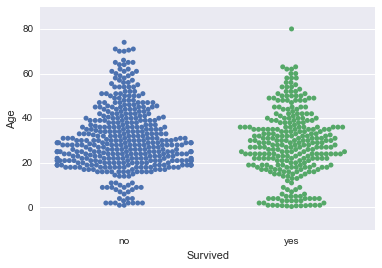

In [116]:
g = sns.swarmplot(x="Survived", y="Age", data=df);
g.set_xticklabels(["no", "yes"])

In [117]:
df[['Age','Survived']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


The swarmplot already shows that the mean age of the survive passanger ist lower than the age of the passengers who survived.

As we can see in the table above, the correlation between the age and survival is quite low. However, this is not surprising as the datatype of the age is float. Therefore, a high correlation would mean that it is more likely that people survived or died if they were older. This might be true in some cases, especially for children, but it would be surprising if there was a significant difference between people being in their 20s and people being in their 30s. 

For this reason, I will first add a column to group children and adults and check if this changes the survival rates.
The column has some 'NaN' values, so I will assume that all of these are adults.

In [118]:
df['Child'] = np.where(df['Age']<16, 1, 0)
survived_children = df[["PassengerId","Child","Survived"]].groupby(["Child","Survived"]).count()
survived_children.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

PassengerId
Child Survived             
0     0           63.737624
      1           36.262376
1     0           40.963855
      1           59.036145

With 36% survival rate for adults and 59% survival rate for children, the chance to survive was higher for children.


#### Women and children first?
"Women and children first!" is a well know approach in the case of an emergency. So we should also check if women and children had a higher chance to survive.

In [119]:
df['Wcf'] = np.where(np.logical_or(df['Child'] == True, df['Female'] == True), 1, 0)

survived_woman_children = df[["PassengerId","Wcf","Survived"]].groupby(["Wcf","Survived"]).count()
survived_woman_children.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

PassengerId
Wcf Survived             
0   0           83.612663
    1           16.387337
1   0           28.248588
    1           71.751412

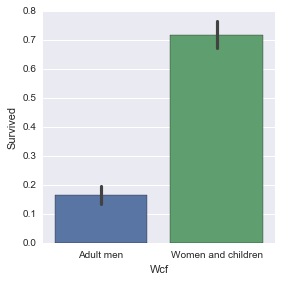

In [131]:
g = sns.factorplot(x = 'Wcf', y= 'Survived', data = df, kind = 'bar')
g.set_xticklabels(["Adult men", "Women and children"])

This shows that the assumption was right. For the group of women and children, 71,75% survived.

### Sex


In [120]:
survived_by_sex = df[["PassengerId","Female","Survived"]].groupby(["Female","Survived"]).count()
survived_by_sex.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

PassengerId
Female Survived             
0      0           81.109185
       1           18.890815
1      0           25.796178
       1           74.203822

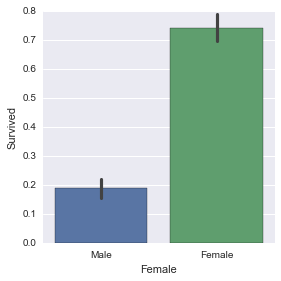

In [121]:
g = sns.factorplot(x = 'Female', y= 'Survived', data = df, kind = 'bar')
g.set_xticklabels(["Male", "Female"])

These findings show that the chance to survive was much higher for women than for men.

### Passenger Class

In [122]:
survived_by_class = df[["PassengerId","Pclass","Survived"]].groupby(["Pclass","Survived"]).count()
survived_by_class.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

PassengerId
Pclass Survived             
1      0           37.037037
       1           62.962963
2      0           52.717391
       1           47.282609
3      0           75.763747
       1           24.236253

This clearly explains the findings regarding the correlation: while about 63% of the people in the first class survived, it was only 47% in the second and 24% in the third class.

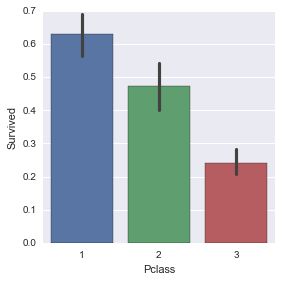

In [123]:
sns.factorplot(x= 'Pclass', y ='Survived', data = df, kind = 'bar')

## Additional visualizations
### Combine sex and passenger class

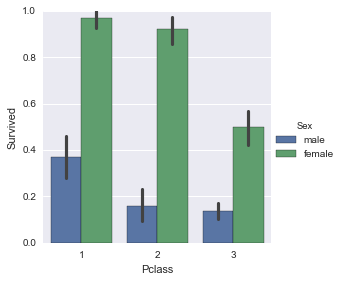

In [124]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df, kind = 'bar')

### Fare vs. passenger class

This plot visualizes the fare passengers paid in each passenger class.

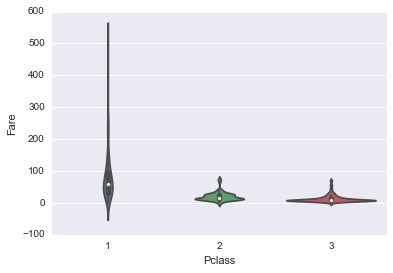

In [125]:
sns.violinplot(x='Pclass', y='Fare', data=df)

## Conclusions

1. The age variable was not that easy to interpret. On the one hand, there were several missing values, which might have influenced the findings. On the other hand, the presentation of the age as integer made the analysis a bit tricky, but I think I found a good alternative representation by generating children and adult categories.

2. Correlation does not imply causation: It is important to note that correlaiton does not imply causation. That simply means that the fact that we found some interesting correlation between variables does not mean that one variable causes the other. An example for this is the age factor in this study. We have found a correlation between the age and the survival of the passengers, but that doesn't mean that the age actually changes the chance to survive. It's rather the fact that other passenger were taking care of younger children.

## Findings and answers to the questions

1. Females were more likely to survive than males.
2. Children were more likely to survive than adults.
3. Passengers traveling in the first class were more likely to survive than passengers travelling in the lower classes. And passengers travelling in the second class were more likely to survive than passengers travelling in the third class.

## References
* [Seaborn API](https://stanford.edu/~mwaskom/software/seaborn/index.html)
* [Pearson's correlation](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf)
* [Pandas Library](http://pandas.pydata.org/)